# XGBoost models for 1, 3, 5 and 10 time windows ** with common hes files

## Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, roc_curve
from sklearn.utils import resample

import xgboost as xgb
from xgboost import plot_importance

## Directory

In [2]:
os.chdir("/rds/general/project/hda_students_data/live/Group9/General/Data/Final_final_final_datasets")

## Load in data

In [3]:
data_train = pd.read_csv("train_data_pca.csv")
data_test = pd.read_csv("test_data_pca.csv")

In [4]:
hes_1yr = pd.read_csv("../1_3_5_10_hes_common/hes_1yr_hes_bin.csv")
hes_3yr = pd.read_csv("../1_3_5_10_hes_common/hes_3yr_hes_bin.csv")
hes_5yr = pd.read_csv("../1_3_5_10_hes_common/hes_5yr_hes_bin.csv")
hes_10yr = pd.read_csv("../1_3_5_10_hes_common/hes_10yr_hes_bin.csv")

In [5]:
print(data_train.shape)
print(data_test.shape)
print(hes_1yr.shape)
print(hes_3yr.shape)
print(hes_5yr.shape)
print(hes_10yr.shape)

(11517, 380)
(3839, 380)
(15356, 193)
(15356, 324)
(15356, 399)
(15356, 498)


In [6]:
hes_1yr = hes_1yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_1yr_train = data_train.merge(hes_1yr, on = "eid", how = "left")
data_1yr_test = data_test.merge(hes_1yr, on = "eid", how = "left")

In [7]:
data_1yr_train.to_csv("train_1yr_common_hesin_pca.csv")
data_1yr_test.to_csv("test_1yr_common_hesin_pca.csv")

In [8]:
hes_3yr = hes_3yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_3yr_train = data_train.merge(hes_3yr, on = "eid", how = "left")
data_3yr_test = data_test.merge(hes_3yr, on = "eid", how = "left")

In [9]:
data_3yr_train.to_csv("train_3yr_common_hesin_pca.csv")
data_3yr_test.to_csv("test_3yr_common_hesin_pca.csv")

In [10]:
hes_5yr = hes_5yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_5yr_train = data_train.merge(hes_5yr, on = "eid", how = "left")
data_5yr_test = data_test.merge(hes_5yr, on = "eid", how = "left")

In [11]:
data_5yr_train.to_csv("train_5yr_common_hesin_pca.csv")
data_5yr_test.to_csv("test_5yr_common_hesin_pca.csv")

In [12]:
hes_10yr = hes_10yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_10yr_train = data_train.merge(hes_10yr, on = "eid", how = "left")
data_10yr_test = data_test.merge(hes_10yr, on = "eid", how = "left")

In [13]:
data_10yr_train.to_csv("train_10yr_common_hesin_pca.csv")
data_10yr_test.to_csv("test_10yr_common_hesin_pca.csv")

#### Check shapes

In [14]:
print(data_1yr_train.shape)
print(data_1yr_test.shape)

print(data_3yr_train.shape)
print(data_3yr_test.shape)

print(data_5yr_train.shape)
print(data_5yr_test.shape)

print(data_10yr_train.shape)
print(data_10yr_test.shape)

(11517, 568)
(3839, 568)
(11517, 699)
(3839, 699)
(11517, 774)
(3839, 774)
(11517, 873)
(3839, 873)


## Balance training datasets

In [4]:
print(data_train["casecont"].value_counts())
print(data_1yr_train["casecont"].value_counts())
print(data_3yr_train["casecont"].value_counts())
print(data_5yr_train["casecont"].value_counts())
print(data_10yr_train["casecont"].value_counts())

0    7657
1    3860
Name: casecont, dtype: int64


NameError: name 'data_1yr_train' is not defined

In [5]:
data_train_maj = data_train[data_train["casecont"] == 0]
data_train_min = data_train[data_train["casecont"] == 1]

data_train_min_upsampled = resample(data_train_min, replace = True, n_samples = 7657, random_state = 289)

data_train = pd.concat([data_train_maj, data_train_min_upsampled])

In [ ]:
data_1yr_train_maj = data_1yr_train[data_1yr_train["casecont"] == 0]
data_1yr_train_min = data_1yr_train[data_1yr_train["casecont"] == 1]

data_1yr_train_min_upsampled = resample(data_1yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_1yr_train = pd.concat([data_1yr_train_maj, data_1yr_train_min_upsampled])

In [16]:
data_1yr_train_maj = data_1yr_train[data_1yr_train["casecont"] == 0]
data_1yr_train_min = data_1yr_train[data_1yr_train["casecont"] == 1]

data_1yr_train_min_upsampled = resample(data_1yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_1yr_train = pd.concat([data_1yr_train_maj, data_1yr_train_min_upsampled])

In [17]:
data_3yr_train_maj = data_3yr_train[data_3yr_train["casecont"] == 0]
data_3yr_train_min = data_3yr_train[data_3yr_train["casecont"] == 1]

data_3yr_train_min_upsampled = resample(data_3yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_3yr_train = pd.concat([data_3yr_train_maj, data_3yr_train_min_upsampled])

In [18]:
data_5yr_train_maj = data_5yr_train[data_5yr_train["casecont"] == 0]
data_5yr_train_min = data_5yr_train[data_5yr_train["casecont"] == 1]

data_5yr_train_min_upsampled = resample(data_5yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_5yr_train = pd.concat([data_5yr_train_maj, data_5yr_train_min_upsampled])

In [19]:
data_10yr_train_maj = data_10yr_train[data_10yr_train["casecont"] == 0]
data_10yr_train_min = data_10yr_train[data_10yr_train["casecont"] == 1]

data_10yr_train_min_upsampled = resample(data_10yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_10yr_train = pd.concat([data_10yr_train_maj, data_10yr_train_min_upsampled])

In [6]:
print(data_train["casecont"].value_counts())
print(data_1yr_train["casecont"].value_counts())
print(data_3yr_train["casecont"].value_counts())
print(data_5yr_train["casecont"].value_counts())
print(data_10yr_train["casecont"].value_counts())

1    7657
0    7657
Name: casecont, dtype: int64


NameError: name 'data_1yr_train' is not defined

## Create X and Y

In [7]:
data_train = data_train.drop(["Unnamed: 0", "eid"], axis = 1)
data_test = data_test.drop(["Unnamed: 0", "eid"], axis = 1)

X_train = data_train.drop(["casecont"], axis = 1)
Y_train = data_train["casecont"]
X_test = data_test.drop(["casecont"], axis = 1)
Y_test = data_test["casecont"]

In [24]:
X_train_1yr = data_1yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_1yr = data_1yr_train["casecont"]

X_test_1yr = data_1yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_1yr = data_1yr_test["casecont"]

X_train_3yr = data_3yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_3yr = data_3yr_train["casecont"]

X_test_3yr = data_3yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_3yr = data_3yr_test["casecont"]

X_train_5yr = data_5yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_5yr = data_5yr_train["casecont"]

X_test_5yr = data_5yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_5yr = data_5yr_test["casecont"]

X_train_10yr = data_10yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_10yr = data_10yr_train["casecont"]

X_test_10yr = data_10yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_10yr = data_10yr_test["casecont"]

In [8]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(15314, 377)
(15314,)
(3839, 377)
(3839,)


In [25]:
print(X_train_1yr.shape)
print(Y_train_1yr.shape) 

print(X_test_1yr.shape)
print(Y_test_1yr.shape) 

print(X_train_3yr.shape)
print(Y_train_3yr.shape) 

print(X_test_3yr.shape)
print(Y_test_3yr.shape) 

print(X_train_5yr.shape)
print(Y_train_5yr.shape) 

print(X_test_5yr.shape)
print(Y_test_5yr.shape) 

print(X_train_10yr.shape)
print(Y_train_10yr.shape) 

print(X_test_10yr.shape)
print(Y_test_10yr.shape) 

(15314, 565)
(15314,)
(3839, 565)
(3839,)
(15314, 696)
(15314,)
(3839, 696)
(3839,)
(15314, 771)
(15314,)
(3839, 771)
(3839,)
(15314, 870)
(15314,)
(3839, 870)
(3839,)


In [13]:
X_train.head()

,X21022.0.0,X31.0.0.y,0,1,2,3,4,5,6,7,...,365,366,367,368,369,370,371,372,373,374
0,66,1,-3.191095,-0.677469,0.311401,0.500885,2.155006,1.952517,-1.528051,1.665598,...,0.324298,-0.851730,-0.237109,-0.287929,-0.337016,0.108713,0.207263,0.305223,0.409423,0.150535
1,69,1,-0.387576,-1.836874,-2.018984,1.149321,-1.141178,1.704224,0.306925,0.115916,...,0.069974,0.249612,0.082616,0.244594,-0.044925,-0.230128,0.050705,-0.075294,0.201844,-0.675504
2,50,0,1.294949,-4.484496,-0.837069,1.851994,1.368840,1.717175,2.932464,-2.202618,...,-0.519334,-0.016357,0.207302,-0.444398,-0.071138,-0.382779,-0.195934,0.450909,-0.082163,0.295133
3,46,1,-0.002175,10.232414,-4.838340,6.001560,-1.119284,-1.379144,-0.687119,-0.015487,...,0.130083,-0.012671,0.205144,-0.207965,-0.268298,-0.083325,-0.022101,-0.094901,-0.162897,-0.168396
4,52,0,1.058770,-1.506609,0.428277,1.998242,-1.711726,-2.130647,0.741620,-2.262539,...,0.080763,0.057671,-0.109960,0.379671,0.044302,0.367752,-0.433283,-0.101109,-0.341636,0.338405


In [26]:
X_train_1yr.head()

,X21022.0.0,X31.0.0.y,0,1,2,3,4,5,6,7,...,Z88,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z98,Z99
0,66,1,-3.191095,-0.677469,0.311401,0.500885,2.155006,1.952517,-1.528051,1.665598,...,0,0,0,0,0,0,0,0,0,0
1,69,1,-0.387576,-1.836874,-2.018984,1.149321,-1.141178,1.704224,0.306925,0.115916,...,0,0,0,0,0,0,0,0,0,0
2,50,0,1.294949,-4.484496,-0.837069,1.851994,1.368840,1.717175,2.932464,-2.202618,...,0,0,0,0,0,0,0,0,0,0
3,46,1,-0.002175,10.232414,-4.838340,6.001560,-1.119284,-1.379144,-0.687119,-0.015487,...,0,0,0,0,0,0,0,0,0,0
4,52,0,1.058770,-1.506609,0.428277,1.998242,-1.711726,-2.130647,0.741620,-2.262539,...,0,0,0,0,0,0,0,0,0,0


## XGBoost Models

#### Baseline models

In [14]:
model = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
train_score = round(model.score(X_train, Y_train), 5)
test_score = round(model.score(X_test, Y_test), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76864
Testing accuracy => 0.67596


In [27]:
model_1yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_1yr.fit(X_train_1yr, Y_train_1yr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
train_score = round(model_1yr.score(X_train_1yr, Y_train_1yr), 5)
test_score = round(model_1yr.score(X_test_1yr, Y_test_1yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76342
Testing accuracy => 0.68351


In [29]:
model_3yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_3yr.fit(X_train_3yr, Y_train_3yr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
train_score = round(model_3yr.score(X_train_3yr, Y_train_3yr), 5)
test_score = round(model_3yr.score(X_test_3yr, Y_test_3yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76407
Testing accuracy => 0.68299


In [31]:
model_5yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_5yr.fit(X_train_5yr, Y_train_5yr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
train_score = round(model_5yr.score(X_train_5yr, Y_train_5yr), 5)
test_score = round(model_5yr.score(X_test_5yr, Y_test_5yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76192
Testing accuracy => 0.67778


In [33]:
model_10yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_10yr.fit(X_train_10yr, Y_train_10yr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
train_score = round(model_10yr.score(X_train_10yr, Y_train_10yr), 5)
test_score = round(model_10yr.score(X_test_10yr, Y_test_10yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76107
Testing accuracy => 0.68273


## Plot the ROC curves

#### This is the code to build the roc curve plot, will need more results obviously, but shouldn't take too long to extend this code!

In [16]:
result_table = pd.DataFrame(columns=['Time window', 'fpr','tpr','auc'])

In [17]:
yproba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  yproba)
auc = roc_auc_score(Y_test, yproba)

result_table = result_table.append({'Time window':"1 year",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [36]:
yproba = model_1yr.predict_proba(X_test_1yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_1yr,  yproba)
auc = roc_auc_score(Y_test_1yr, yproba)

result_table = result_table.append({'Time window':"1 year",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [37]:
yproba = model_3yr.predict_proba(X_test_3yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_3yr,  yproba)
auc = roc_auc_score(Y_test_3yr, yproba)

result_table = result_table.append({'Time window':"3 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [38]:
yproba = model_5yr.predict_proba(X_test_5yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_5yr,  yproba)
auc = roc_auc_score(Y_test_5yr, yproba)

result_table = result_table.append({'Time window':"5 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [39]:
yproba = model_10yr.predict_proba(X_test_10yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_10yr,  yproba)
auc = roc_auc_score(Y_test_10yr, yproba)

result_table = result_table.append({'Time window':"10 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

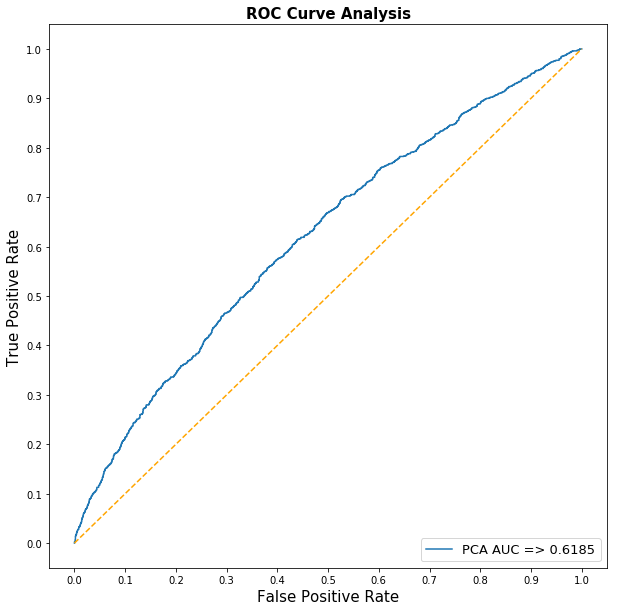

In [18]:
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(result_table.fpr[0], result_table.tpr[0], label="PCA AUC => " + str(round(result_table.auc[0], 4)))
# plt.plot(result_table.fpr[0], result_table.tpr[0], label="1 Year AUC => " + str(round(result_table.auc[0], 4)))
# plt.plot(result_table.fpr[1], result_table.tpr[1], label="3 Years AUC => " + str(round(result_table.auc[1], 4)))
# plt.plot(result_table.fpr[2], result_table.tpr[2], label="5 Years AUC => " + str(round(result_table.auc[2], 4)))
# plt.plot(result_table.fpr[3], result_table.tpr[3], label="10 Years AUC => " + str(round(result_table.auc[3], 4)))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Extract important features

#### PCA

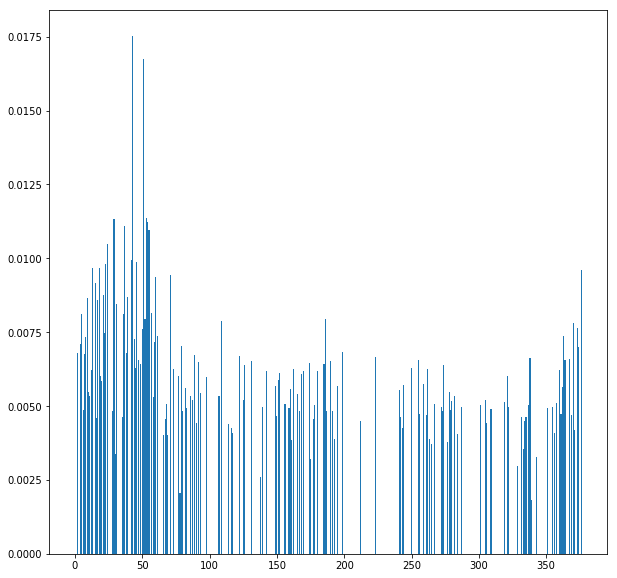

In [19]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

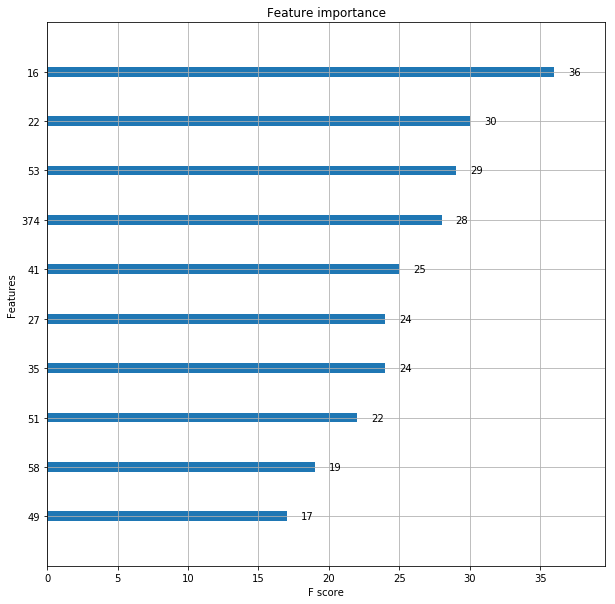

In [20]:
plot_importance(model, max_num_features=10)
plt.show()

#### 1 Year

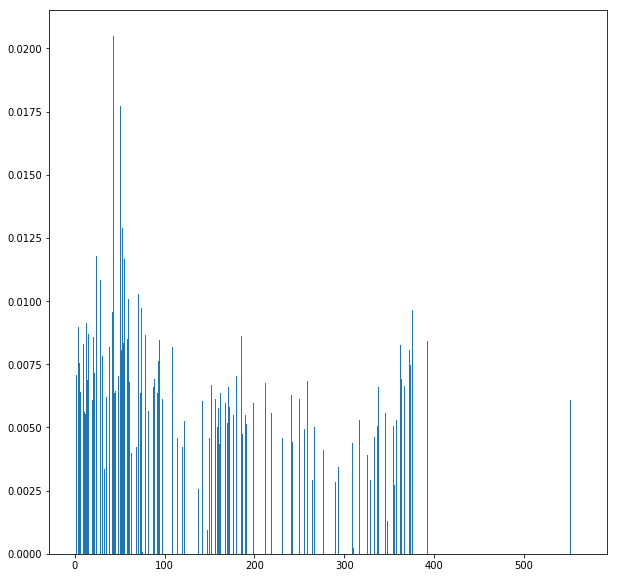

In [41]:
plt.bar(range(len(model_1yr.feature_importances_)), model_1yr.feature_importances_)
plt.show()

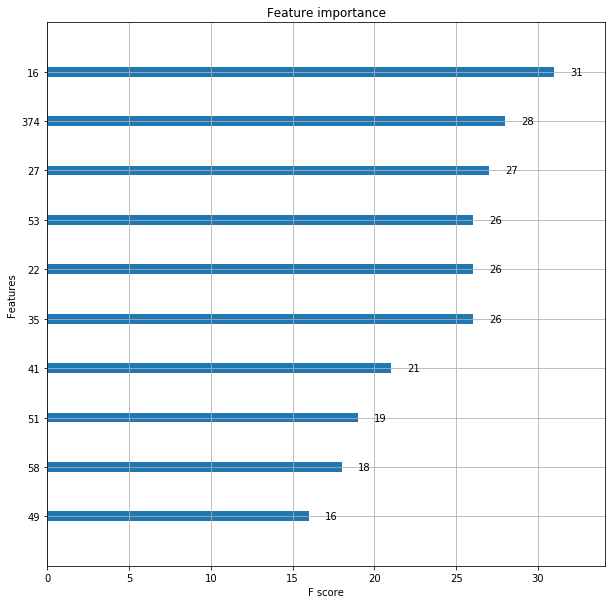

In [42]:
plot_importance(model_1yr, max_num_features=10)
plt.show()

#### 3 Years

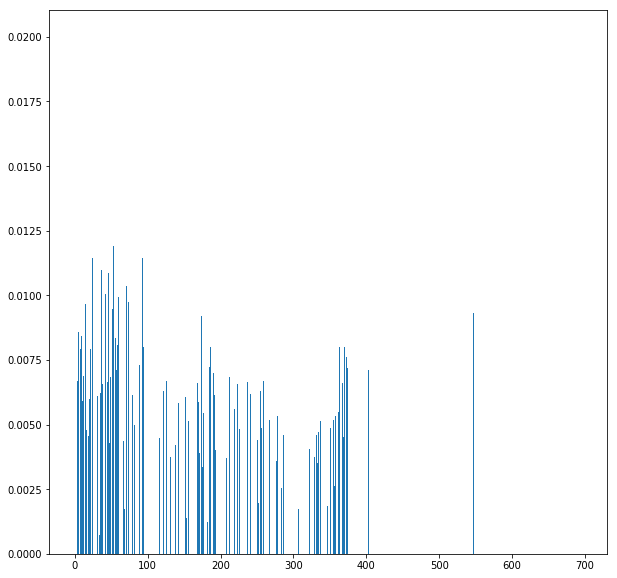

In [43]:
plt.bar(range(len(model_3yr.feature_importances_)), model_3yr.feature_importances_)
plt.show()

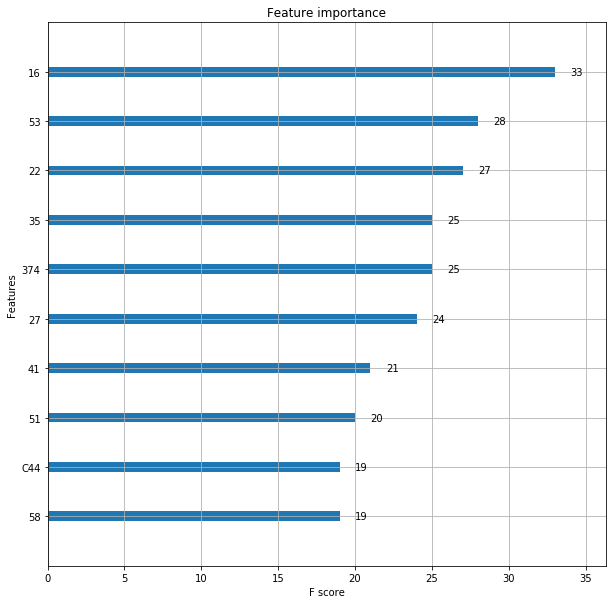

In [44]:
plot_importance(model_3yr, max_num_features=10)
plt.show()

#### 5 Years

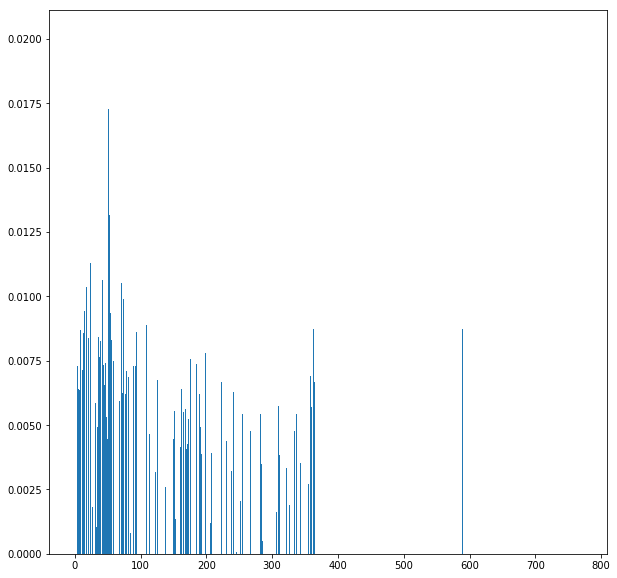

In [45]:
plt.bar(range(len(model_5yr.feature_importances_)), model_5yr.feature_importances_)
plt.show()

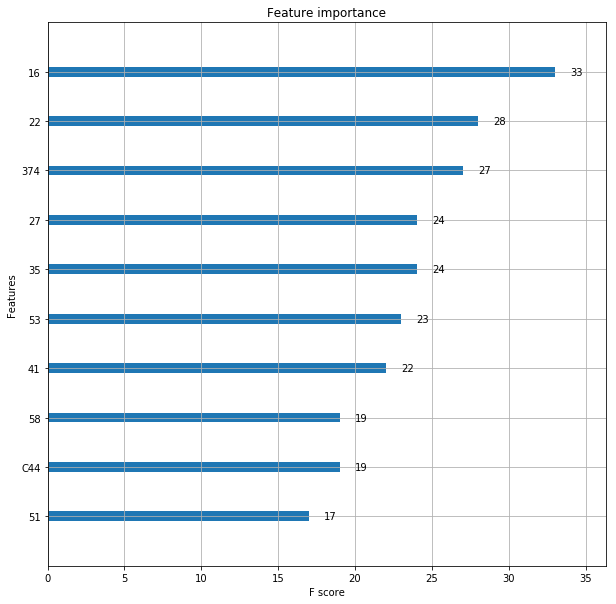

In [46]:
plot_importance(model_5yr, max_num_features=10)
plt.show()

#### 10 Years

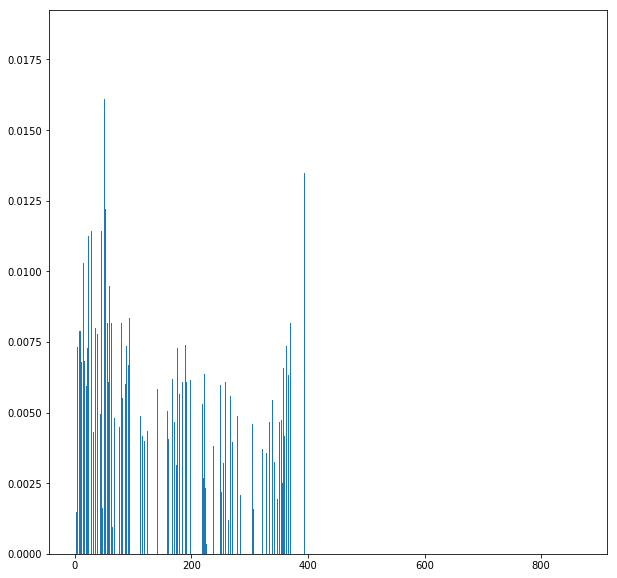

In [47]:
plt.bar(range(len(model_10yr.feature_importances_)), model_10yr.feature_importances_)
plt.show()

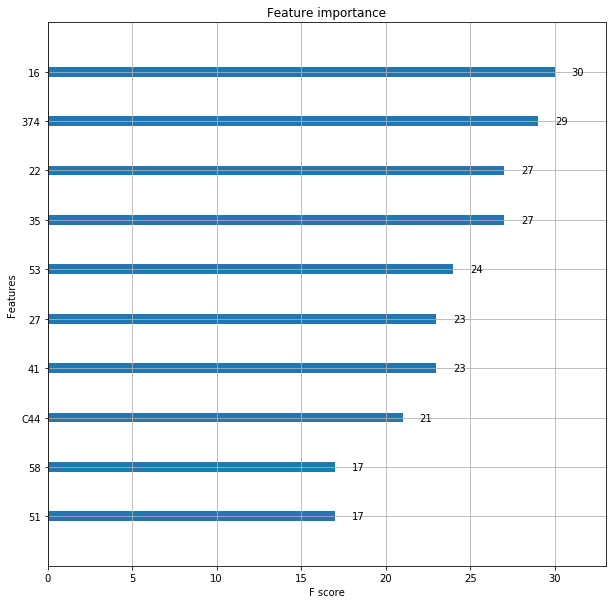

In [48]:
plot_importance(model_10yr, max_num_features=10)
plt.show()